In [4]:
import numpy as np
import pandas as pd
import datetime as dt

from prophet import Prophet
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.tsatools import detrend

In [5]:
data = pd.read_csv('/kaggle/input/avocado-price/Avocado.csv', index_col='Unnamed: 0')
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

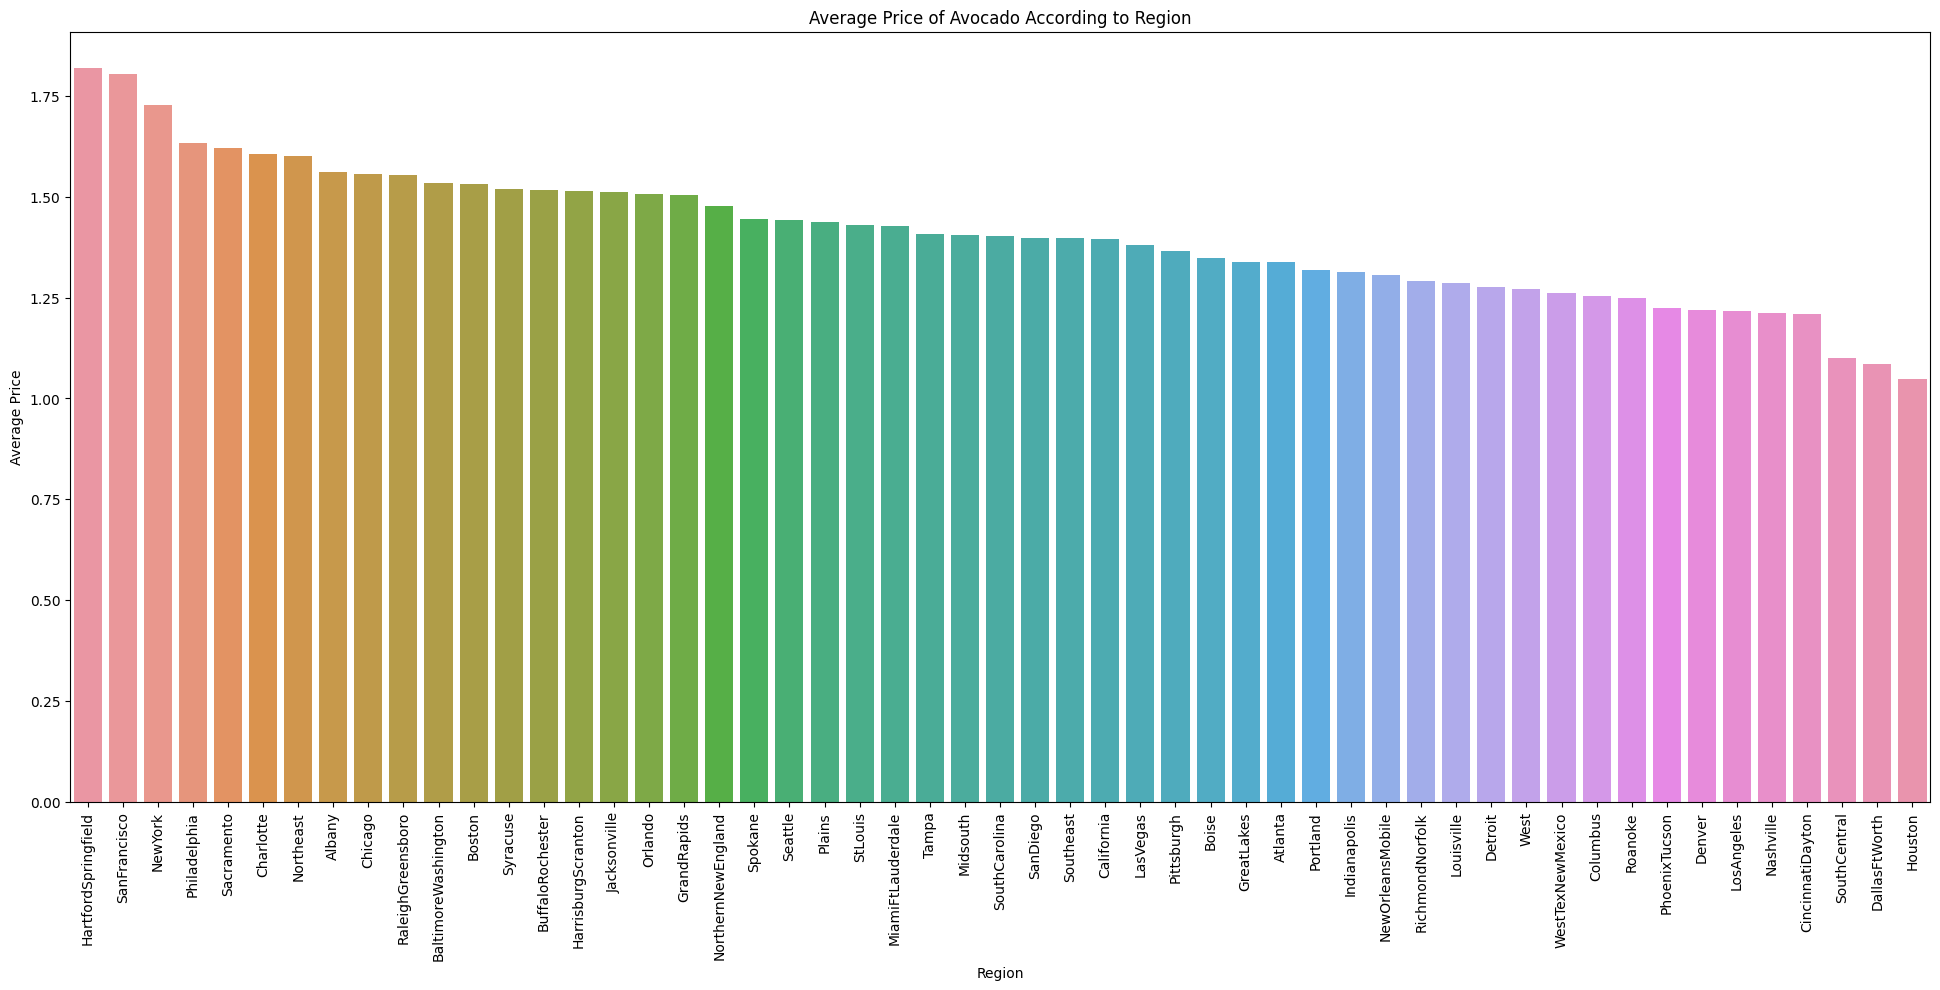

In [7]:
region_list=list(data[~(data['region']=='TotalUS')].region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Total Volume of Avocado According to Region')

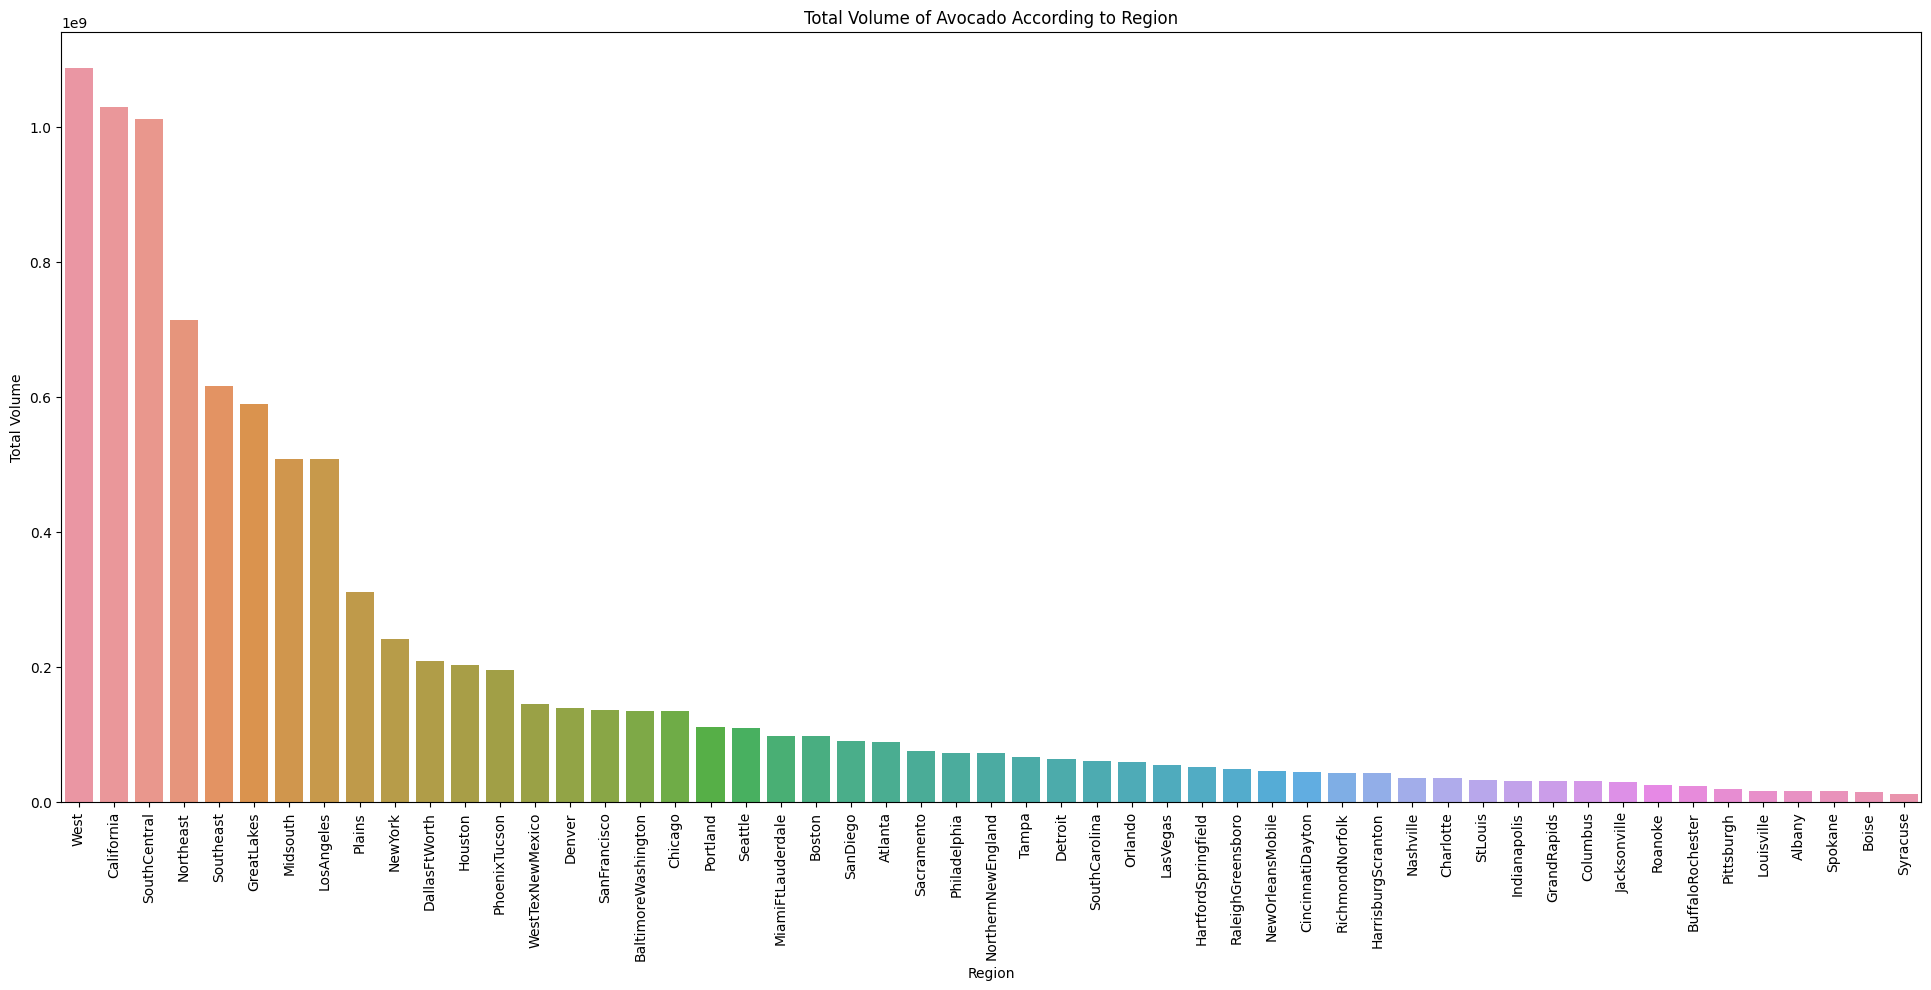

In [8]:
# region_list=list(data[~(data['region']=='TotalUs')].region.unique())
total_volume=[]

for i in region_list:
    x=data[data.region==i]
    region_volume=sum(x['Total Volume'])
    total_volume.append(region_volume)

df2=pd.DataFrame({'region_list':region_list,'total_volume':total_volume})
new_index=df2.total_volume.sort_values(ascending=False).index.values
sorted_data=df2.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado According to Region')

In [9]:
df = data[(data['region']=='California') & (data['type']=='conventional')]
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,0.80,10894677.77,4473811.63,4097591.67,146357.78,2176916.69,2072477.62,34196.27,70242.80,conventional,2018,California
8,2018-01-28,1.16,6134040.58,2254631.80,2185495.65,121090.87,1572822.26,1480527.70,24545.94,67748.62,conventional,2018,California
9,2018-01-21,1.12,6610010.64,2378177.09,2590301.70,122950.68,1518581.17,1431898.88,24801.59,61880.70,conventional,2018,California
10,2018-01-14,1.27,5927016.73,2098762.55,2356359.93,151045.33,1320848.92,1226559.09,25390.97,68898.86,conventional,2018,California


In [10]:
noel_list = []
blkfrd_list = []
for year in range(2015, 2018):
    noel = pd.DataFrame({
    'holiday': 'Noel_week',
    'ds': pd.date_range(
        dt.datetime(year, 12, 18),
        dt.datetime(year, 12, 25)
    )
    })
    noel_list.append(noel)
    
    black_friday = pd.DataFrame({
    'holiday': 'BlackFriday_week',
    'ds': pd.date_range(
        dt.datetime(year, 11, 23),
        dt.datetime(year, 11, 30)
    )
    })
    blkfrd_list.append(black_friday)
    

df_noel = pd.concat(
    noel_list,
    ignore_index=True
)

df_blkfrd = pd.concat(
    blkfrd_list,
    ignore_index=True
)

df_election = pd.DataFrame({
    'holiday': 'Election_prepare',
    'ds': pd.date_range(
        dt.datetime(2016, 1, 1),
        dt.datetime(2016, 11, 8)
    )
})

df_tax = pd.DataFrame({
    'holiday': 'Tax',
    'ds': pd.date_range(
        dt.datetime(2017, 8, 1),
        dt.datetime(2017, 12, 31)
    )
})

## combine holidays
holidays = pd.concat(
    [df_noel, df_blkfrd, df_election, df_tax],
    ignore_index=True
)

holidays

,holiday,ds
0,Noel_week,2015-12-18
1,Noel_week,2015-12-19
2,Noel_week,2015-12-20
3,Noel_week,2015-12-21
4,Noel_week,2015-12-22
...,...,...
509,Tax,2017-12-27
510,Tax,2017-12-28
511,Tax,2017-12-29
512,Tax,2017-12-30


In [11]:
df_train_raw = df[['Date', 'AveragePrice']]
df_train_raw

,Date,AveragePrice
0,2015-12-27,0.90
1,2015-12-20,0.94
2,2015-12-13,0.87
3,2015-12-06,0.78
4,2015-11-29,0.91
...,...,...
7,2018-02-04,0.80
8,2018-01-28,1.16
9,2018-01-21,1.12
10,2018-01-14,1.27


In [12]:
# df_train_detrended = df_train_raw.copy()

In [13]:
# df_train_detrended['Detrended'] = detrend(df_train_raw['AveragePrice'], order=2)
# df_train_detrended.drop(columns=['AveragePrice'], inplace=True)

In [14]:
# df_train_detrended

In [15]:
# df_train_raw['Date'] = pd.to_datetime(df_train_raw['Date'])
# df_train_detrended['Date'] = pd.to_datetime(df_train_detrended['Date'])

# # data_train = df_train[(df_train['Date'].dt.year < 2017) | ((df_train['Date'].dt.year == 2017) & (df_train['Date'].dt.month <= 3))]
# # data_predict = df_train[((df_train['Date'].dt.year == 2018) | ((df_train['Date'].dt.year == 2017) & (df_train['Date'].dt.month >= 3)))]

# data_train_raw = df_train_raw[df_train_raw['Date'].dt.year <= 2017]
# data_predict_raw = df_train_raw[df_train_raw['Date'].dt.year == 2018]

# data_train_detrended = df_train_detrended[df_train_detrended['Date'].dt.year <= 2017]
# data_predict_detrended = df_train_detrended[df_train_detrended['Date'].dt.year == 2018]

In [16]:
# data_predict = data_predict[['Date', 'Detrended']]

In [17]:
# data_train = data_train[['Date', 'Detrended']]

In [18]:
# data_train_detrended.columns=['ds', 'y']

In [19]:
# m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1, holidays=holidays)
# m.fit(data_train_detrended)

In [20]:
# future_detrended = m.make_future_dataframe(periods=13, freq='W')
# forecast_detrended = m.predict(future_detrended)

In [21]:
# forecast_detrended

In [22]:
# forecast_detrended_df = forecast_detrended[['ds', 'yhat']]
# forecast_detrended_df.columns = ['Date', 'PredictPrice_detrended']
# forecast_detrended_df

In [23]:
# result_df_detrended = pd.merge(data_predict_detrended, forecast_detrended_df, on='Date', how='left', validate='1:1')
# result_df_detrended = result_df_detrended.sort_values(by='Date', ascending=True)
# result_df_detrended

In [24]:
# plt.figure(figsize=(10, 6))
# plt.plot(result_df_detrended['Date'], result_df_detrended['Detrended'], label='Actual Price', marker='o')
# plt.plot(result_df_detrended['Date'], result_df_detrended['PredictPrice_detrended'], label='Predicted Price - detrended', marker='x')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('Actual Price vs. Predicted Price')
# plt.legend()
# plt.grid(False)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [25]:
# mae = mean_absolute_error(result_df_detrended['Detrended'], result_df_detrended['PredictPrice_detrended'])
# print("Mean Absolute Error (MAE):", mae)

In [26]:
# m.plot_components(forecast_detrended)

In [27]:
df_train_raw['Date'] = pd.to_datetime(df_train_raw['Date'])
data_train_raw = df_train_raw[df_train_raw['Date'].dt.year <= 2017]
data_predict_raw = df_train_raw[df_train_raw['Date'].dt.year == 2018]
data_train_raw.columns=['ds', 'y']

In [150]:
changepoints=['2015-10-25', '2016-02-07', '2016-05-01', '2016-11-06', '2017-02-05', '2017-10-15'] # '2016-12-10'
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1, holidays=holidays, changepoint_prior_scale=0.01, changepoints=changepoints)
model.fit(data_train_raw)

21:17:30 - cmdstanpy - INFO - Chain [1] start processing
21:17:30 - cmdstanpy - INFO - Chain [1] done processing


In [151]:
future_raw = model.make_future_dataframe(periods=13, freq='W')
forecast_raw = model.predict(future_raw)
forecast_raw

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,BlackFriday_week,BlackFriday_week_lower,BlackFriday_week_upper,Election_prepare,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.002403,0.649393,0.990985,1.002403,1.002403,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.181476,-0.181476,-0.181476,0.0,0.0,0.0,0.820927
1,2015-01-11,1.003860,0.707248,1.033637,1.003860,1.003860,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.134330,-0.134330,-0.134330,0.0,0.0,0.0,0.869530
2,2015-01-18,1.005316,0.706718,1.046292,1.005316,1.005316,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.126830,-0.126830,-0.126830,0.0,0.0,0.0,0.878486
3,2015-01-25,1.006773,0.678741,1.012663,1.006773,1.006773,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.160313,-0.160313,-0.160313,0.0,0.0,0.0,0.846460
4,2015-02-01,1.008229,0.631213,0.968885,1.008229,1.008229,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.210331,-0.210331,-0.210331,0.0,0.0,0.0,0.797898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2018-03-04,1.242705,1.037683,1.372847,1.242705,1.242705,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.038734,-0.038734,-0.038734,0.0,0.0,0.0,1.203971
166,2018-03-11,1.244161,1.081788,1.428272,1.244161,1.244161,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.009375,0.009375,0.009375,0.0,0.0,0.0,1.253536
167,2018-03-18,1.245617,1.102290,1.440596,1.245617,1.245617,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.027180,0.027180,0.027180,0.0,0.0,0.0,1.272797
168,2018-03-25,1.247074,1.108804,1.443573,1.247074,1.247074,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.033072,0.033072,0.033072,0.0,0.0,0.0,1.280145


In [152]:
forecast_raw_df = forecast_raw[['ds', 'yhat']]
forecast_raw_df.columns = ['Date', 'PredictPrice_raw']
forecast_raw_df

,Date,PredictPrice_raw
0,2015-01-04,0.820927
1,2015-01-11,0.869530
2,2015-01-18,0.878486
3,2015-01-25,0.846460
4,2015-02-01,0.797898
...,...,...
165,2018-03-04,1.203971
166,2018-03-11,1.253536
167,2018-03-18,1.272797
168,2018-03-25,1.280145


In [153]:
result_df_raw = pd.merge(df_train_raw, forecast_raw_df, on='Date', how='left', validate='1:1')
result_df_raw = result_df_raw.sort_values(by='Date', ascending=True)
result_df_raw

,Date,AveragePrice,PredictPrice_raw
51,2015-01-04,0.93,0.820927
50,2015-01-11,0.92,0.869530
49,2015-01-18,1.02,0.878486
48,2015-01-25,1.06,0.846460
47,2015-02-01,0.85,0.797898
...,...,...,...
161,2018-02-25,1.03,1.125339
160,2018-03-04,1.13,1.203971
159,2018-03-11,1.11,1.253536
158,2018-03-18,1.02,1.272797


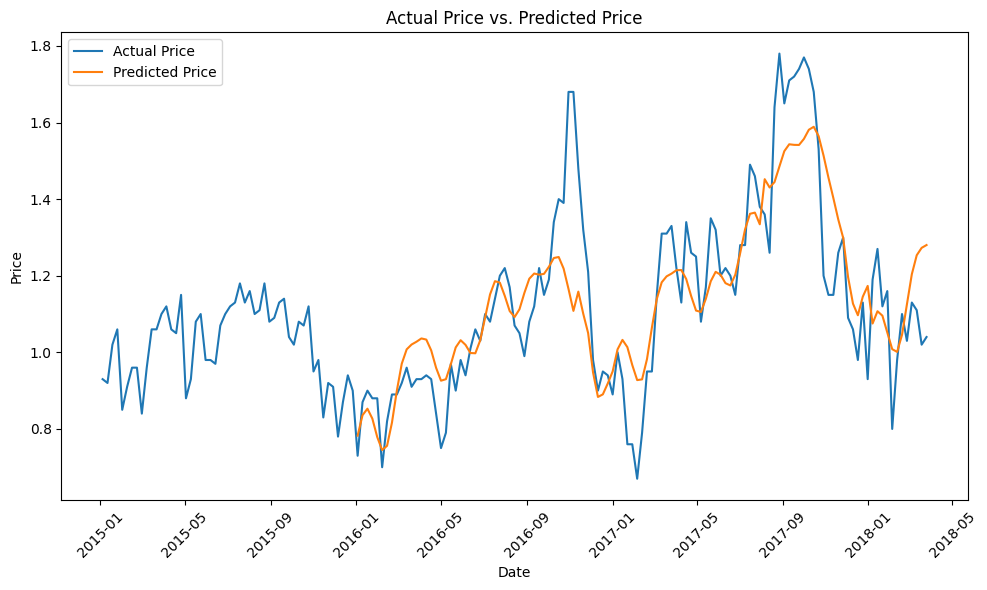

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(result_df_raw['Date'], result_df_raw['AveragePrice'], label='Actual Price')
plt.plot(result_df_raw['Date'][52:], result_df_raw['PredictPrice_raw'][52:], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [155]:
mae = mean_absolute_error(result_df_raw['AveragePrice'][52:], result_df_raw['PredictPrice_raw'][52:])
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.1088197050928281


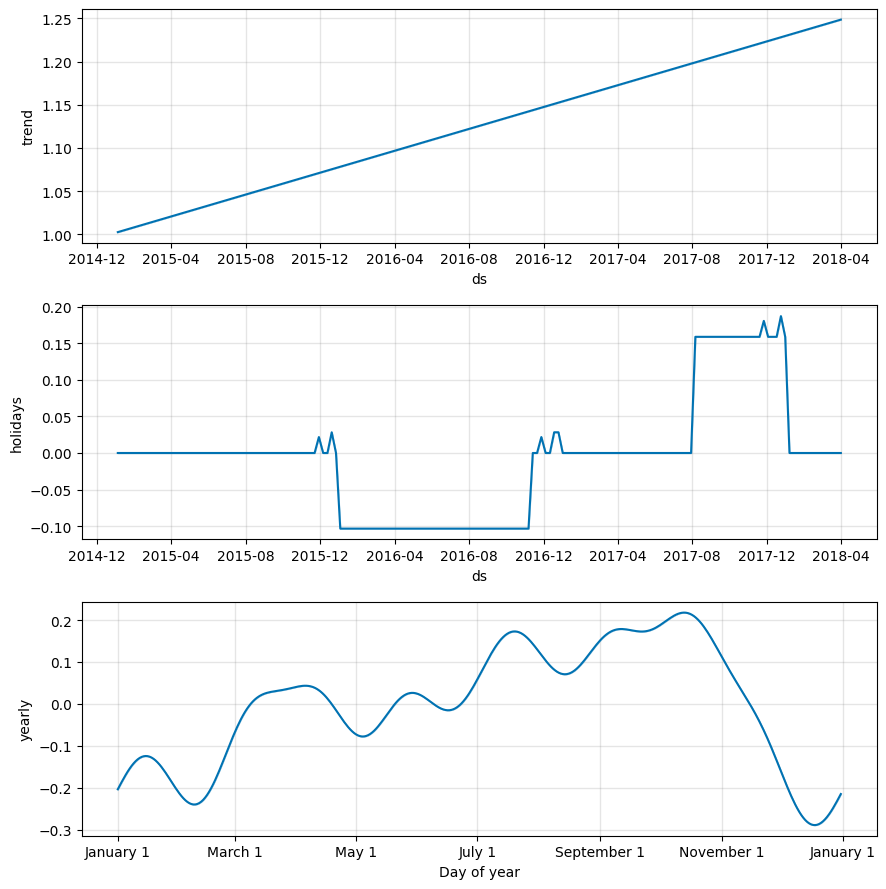

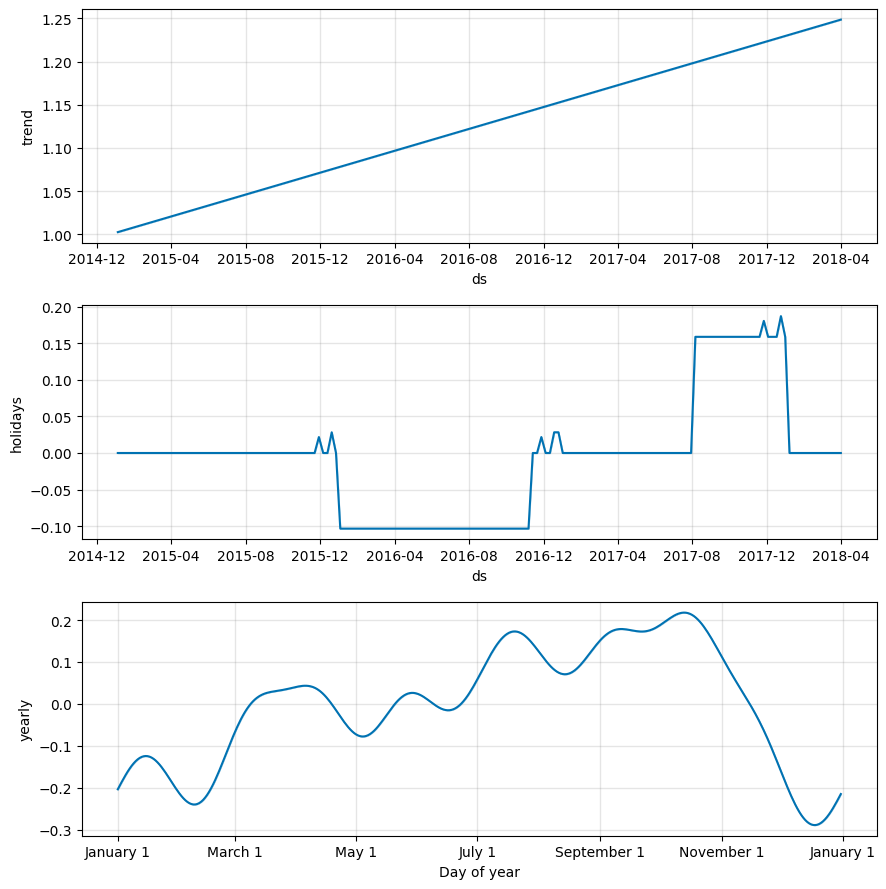

In [156]:
model.plot_components(forecast_raw)

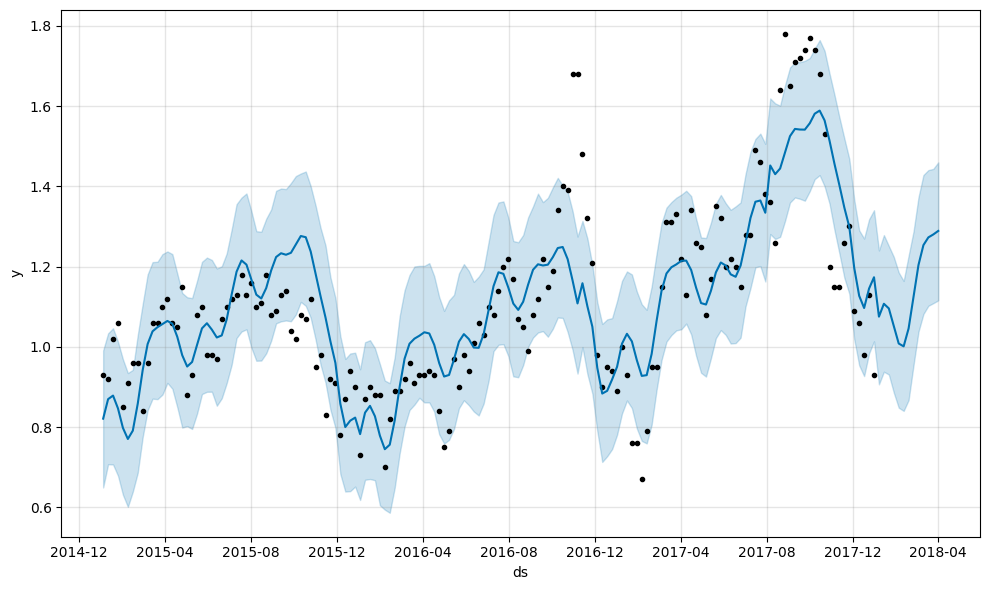

In [157]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast_raw)
# a = add_changepoints_to_plot(fig.gca(), model, forecast_raw)

In [158]:
model.changepoints

0   2015-10-25
1   2016-02-07
2   2016-05-01
3   2016-11-06
4   2017-02-05
5   2017-10-15
Name: ds, dtype: datetime64[ns]

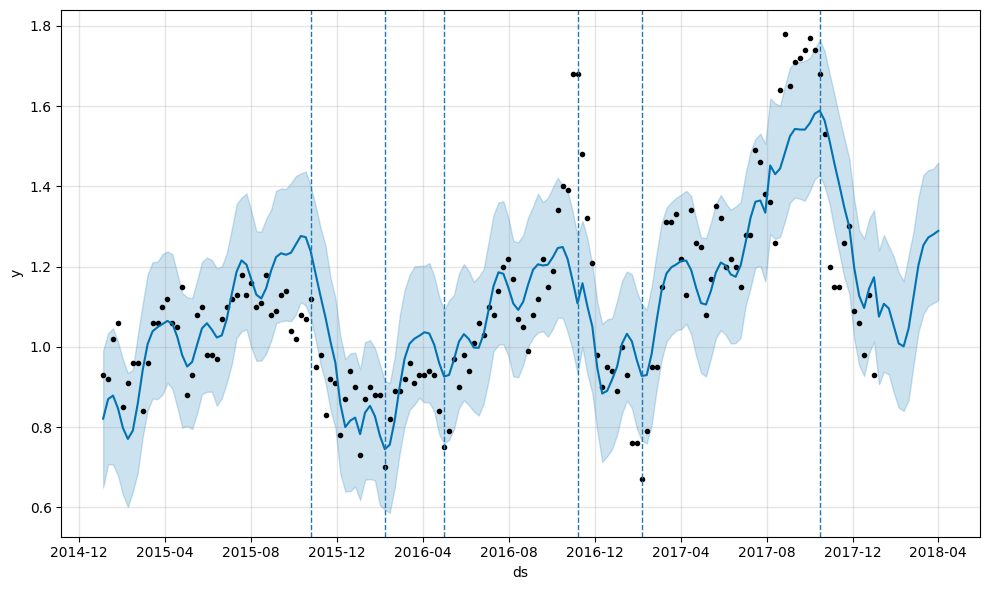

In [159]:
fig = model.plot(forecast_raw)
for changepoint in model.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

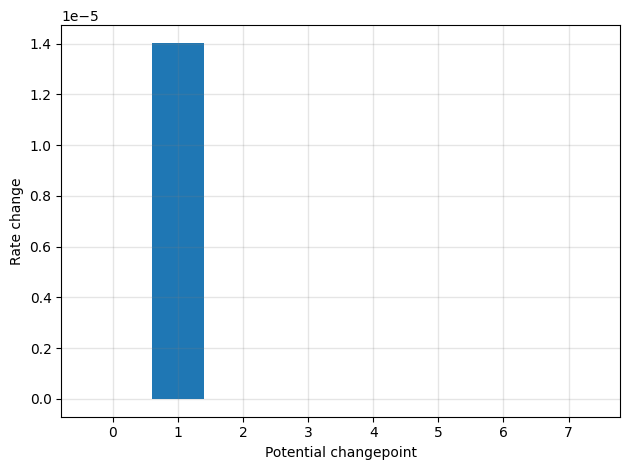

In [101]:
deltas = model.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

In [112]:
df_train_raw[df_train_raw['Date'].dt.year==2015]

,Date,AveragePrice
0,2015-12-27,0.90
1,2015-12-20,0.94
2,2015-12-13,0.87
3,2015-12-06,0.78
4,2015-11-29,0.91
5,2015-11-22,0.92
6,2015-11-15,0.83
7,2015-11-08,0.98
8,2015-11-01,0.95
9,2015-10-25,1.12
